

## Assignment 2: Data, Grammar and Engineering

**AMS MADE YMS31303**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>

---



## Question 1

We will work with data from the Guardian's version of [Wikileaks' Afghanistan war logs](http://www.theguardian.com/news/datablog/2010/jul/27/wikileaks-afghanistan-data-datajournalism). The table is stored on a GoogleDoc on the following address:

> [https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1](https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1)

Write a Python code snippet using IPython.display to embed this Google Sheet directly into a Jupyter notebook for easy reference and interaction.

In [4]:
from IPython.display import IFrame
url = 'https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en&pli=1&gid=1#gid=1'
IFrame(url, 900, 500)



## Question 2
a) Save the csv file to your compluter and Load the data in Tab "TOTAL Casualties".

b) Display the first 5 rows of the dataset using .head().

c) Extract the column names and create a dictionary where each column name is the key, and the first value in that column is the value.

In [5]:
import matplotlib
import os              
import pandas as pd    
import numpy as np      
import seaborn as sns  
import os            

In [6]:

f = 'data/wiki.csv' #downloaded from google 
db = pd.read_csv(f, skiprows=1, skipfooter=1, engine="python") #here I'm just displaying the table, but it has to be "centered"
db.head()

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
0,2004,January,15.0,51,23.0,NaN,11
1,2004,February,NaN,7,4.0,5.0,2
2,2004,March,19.0,2,NaN,2.0,3
3,2004,April,5.0,3,19.0,NaN,3
4,2004,May,18.0,29,56.0,6.0,9


In [7]:
dict = {} #creating the empty dictionary

for column in db.columns: 
    dict[column] = db[column].iloc[0]
print(dict)

{'Year': np.int64(2004), 'Month': 'January', 'Taliban': np.float64(15.0), 'Civilians': np.int64(51), 'Afghan forces': np.float64(23.0), 'Nato (detailed in spreadsheet)': np.float64(nan), 'Nato - official figures': np.int64(11)}


## Question 3
a) Plot a histogram of any numeric column from the dataset.

b) Use a kernel density plot (KDE) to visualize the distribution of another numeric column.

c) Create a bar chart of a categorical variable and discuss how the plot changes if you switch to a horizontal bar plot.

<Axes: xlabel='Taliban', ylabel='Count'>

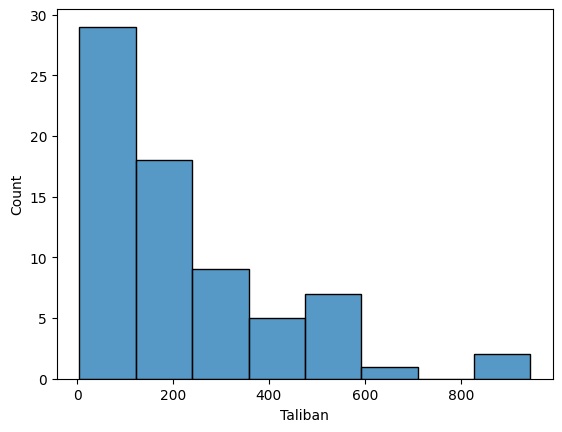

In [8]:
sns.histplot(x='Taliban', data=db)

<Axes: xlabel='Civilians', ylabel='Density'>

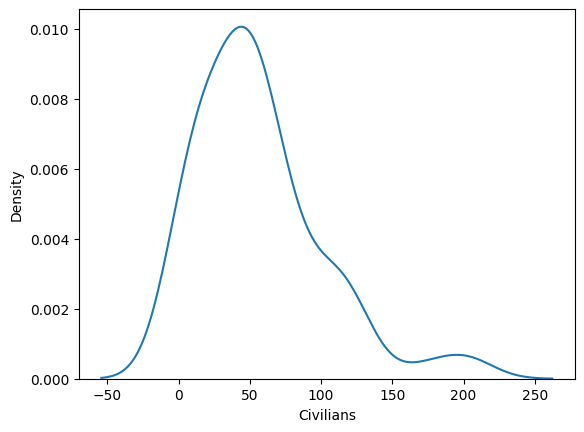

In [54]:
sns.kdeplot(db['Civilians'])

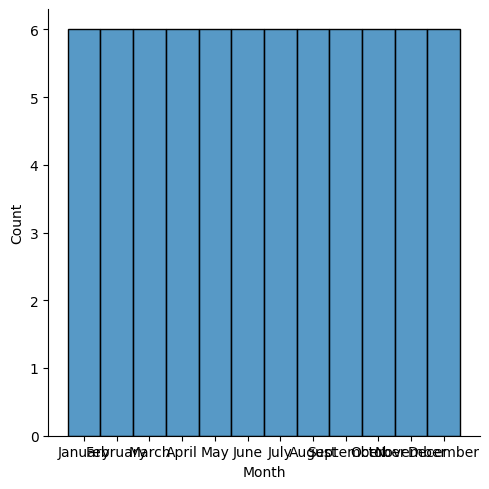

In [57]:
sns.displot(db, x='Month')

## Question 4
a) Write a loop that iterates through each row of a DataFrame and prints the value of one specific column.

b) Modify the loop so that it extracts rows where a numeric column value is greater than a threshold and stores these rows in a new DataFrame.

In [ ]:
for 

## Question 5
a) Crate a list containing the names "Civilians" and "Afghan forces"

b) From the imported data keep the the values from these two columns only. Keep in mind that "Year" and "Month" identify each column and sould remain in the dataset.

c) Obtain a monthly total count of casualties for these two groups and create a line and a bar plot of them.


In [11]:
list_CA = list(db)
new_list = [list_CA[3], list_CA[4]]
new_list

['Civilians', 'Afghan forces']

In [12]:
db_new = db.drop(columns=["Taliban", "Nato (detailed in spreadsheet)", "Nato - official figures"])
db_new["total"] = db[new_list[0]] + db[new_list[1]]
db_new

,Year,Month,Civilians,Afghan forces,total
0,2004,January,51,23.0,74.0
1,2004,February,7,4.0,11.0
2,2004,March,2,NaN,NaN
3,2004,April,3,19.0,22.0
4,2004,May,29,56.0,85.0
...,...,...,...,...,...
67,2009,August,206,190.0,396.0
68,2009,September,197,133.0,330.0
69,2009,October,107,86.0,193.0
70,2009,November,120,69.0,189.0


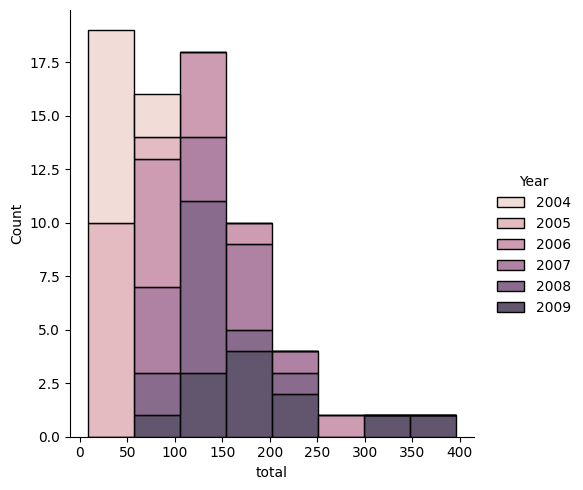

In [13]:
sns.displot(x="total", data=db_new, hue="Year", multiple="stack")